## pandas 최종실습
 - 범죄현황 데이터 분석

In [1]:
# 데이터 분석에 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

In [131]:
# 데이터 읽어오기! (조건 ㅣ 인덱스를 '관서명' 으로 설정하기, 한글 인코딩 ('euc.kr'))
data2019 = pd.read_csv('2019.csv', index_col= '관서명', encoding = 'euc_kr')
data2020 = pd.read_csv('2020.csv', index_col= '관서명', encoding = 'euc_kr')
data2021 = pd.read_csv('2021.csv', index_col= '관서명', encoding = 'euc_kr')

In [49]:
# 데이터들의 크기 확인
print(data2019.shape)
print(data2020.shape)
print(data2021.shape)

# 2021 데이터만 행이 많음

(36, 6)
(36, 6)
(42, 6)


In [14]:
# 데이터의 정보를 확인
print(data2019.info())
print(data2020.info())
print(data2021.info())


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 광주지방경찰청계 to 광주광산경찰서
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분       36 non-null     object
 1   살인       36 non-null     int64 
 2   강도       36 non-null     int64 
 3   강간·강제추행  36 non-null     int64 
 4   절도       36 non-null     int64 
 5   폭력       36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 광주지방경찰청계 to 광주광산경찰서
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분       36 non-null     object
 1   살인       36 non-null     int64 
 2   강도       36 non-null     int64 
 3   강간·강제추행  36 non-null     int64 
 4   절도       36 non-null     int64 
 5   폭력       36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 광주지방경찰청계 to 광주광산경찰서
Dat

<bound method NDFrame._add_numeric_operations.<locals>.sum of 관서명
광주지방경찰청계     9593
광주지방경찰청계     8301
광주지방경찰청계    11774
광주지방경찰청계       58
광주지방경찰청계     5618
광주지방경찰청계     6098
광주동부경찰서      1155
광주동부경찰서       970
광주동부경찰서      1483
광주동부경찰서        10
광주동부경찰서       703
광주동부경찰서       770
광주서부경찰서      2483
광주서부경찰서      2124
광주서부경찰서      3080
광주서부경찰서        19
광주서부경찰서      1366
광주서부경찰서      1695
광주남부경찰서      1081
광주남부경찰서       941
광주남부경찰서      1260
광주남부경찰서         3
광주남부경찰서       675
광주남부경찰서       582
광주북부경찰서      2621
광주북부경찰서      2319
광주북부경찰서      3168
광주북부경찰서        10
광주북부경찰서      1544
광주북부경찰서      1614
광주광산경찰서      2253
광주광산경찰서      1922
광주광산경찰서      2585
광주광산경찰서         6
광주광산경찰서      1181
광주광산경찰서      1398
Name: 폭력, dtype: int64>

In [132]:
# 2019데이터의 인덱스들의 중복을 제거한 후 비교하기 편하도록 정렬
print(data2019.index.unique().sort_values())
print(data2020.index.unique().sort_values())
print(data2021.index.unique().sort_values())

Index(['광주광산경찰서', '광주남부경찰서', '광주동부경찰서', '광주북부경찰서', '광주서부경찰서', '광주지방경찰청계'], dtype='object', name='관서명')
Index(['광주광산경찰서', '광주남부경찰서', '광주동부경찰서', '광주북부경찰서', '광주서부경찰서', '광주지방경찰청계'], dtype='object', name='관서명')
Index(['광주광산경찰서', '광주남부경찰서', '광주동부경찰서', '광주북부경찰서', '광주서부경찰서', '광주지방경찰청',
       '광주지방경찰청계'],
      dtype='object', name='관서명')


In [133]:
# 특정 연도(2021년)에만 존재하는 경찰정인 '광주지방경찰청' 행 삭제 
# 데이터들의 행의 갯수가 달라서 비교가 불편하기때문에
# drop() 으로 삭제
data2021.drop('광주지방경찰청', inplace = True)


In [52]:
# 데이터 삭제 후 튜플의 갯수 확인 (42 -> 36)
print(data2019.shape)
print(data2020.shape)
print(data2021.shape)


(36, 6)
(36, 6)
(36, 6)


In [53]:
# 데이터 간편하게 출력
# .head() : 위의 행 출력 (default = 5)
# .tail() : 아래 행 출력 (default = 5)
data2019.head()


,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618


In [56]:
# 범죄의 합 구하기
# data2019['합계'] = data2019.iloc[:, 1:].sum(axis = 1)
data2019.head()

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618


In [102]:
# 2. 구분 컬럼이 '발생건수'인 데이터들만 가져오기 (boolean 인덱싱)

# 불리언 인덱싱을 위한 재료 생성
temp2019 = data2019[data2019['구분'] == '발생건수']
temp2020 = data2020[data2020['구분'] == '발생건수']
temp2021 = data2021[data2021['구분'] == '발생건수']


temp2019['2019총계'] = temp2019.loc['광주지방경찰청계': , '살인': '폭력'].sum(axis = 1)
temp2020['2020총계'] = temp2020.loc['광주지방경찰청계': , '살인': '폭력'].sum(axis = 1)
temp2021['2021총계'] = temp2021.loc['광주지방경찰청계': , '살인': '폭력'].sum(axis = 1)

# (temp2019['2020총계' - temp2019['2019총계']]) 
# (temp2020['2020총계' - temp2019['2019총계']]) 

temp2021



C:\Users\ottki\AppData\Local\Temp\ipykernel_17220\606481732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2019['2019총계'] = temp2019.loc['광주지방경찰청계': , '살인': '폭력'].sum(axis = 1)
C:\Users\ottki\AppData\Local\Temp\ipykernel_17220\606481732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2020['2020총계'] = temp2020.loc['광주지방경찰청계': , '살인': '폭력'].sum(axis = 1)
C:\Users\ottki\AppData\Local\Temp\ipykernel_17220\606481732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,구분,살인,강도,강간·강제추행,절도,폭력,2021총계
관서명,,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366,13949
광주동부경찰서,발생건수,3,5,77,624,1090,1799
광주서부경찰서,발생건수,0,7,196,1142,2293,3638
광주남부경찰서,발생건수,0,4,68,577,898,1547
광주북부경찰서,발생건수,3,5,215,1546,2176,3945
광주광산경찰서,발생건수,3,12,169,927,1909,3020


#### 증감률 확인하기
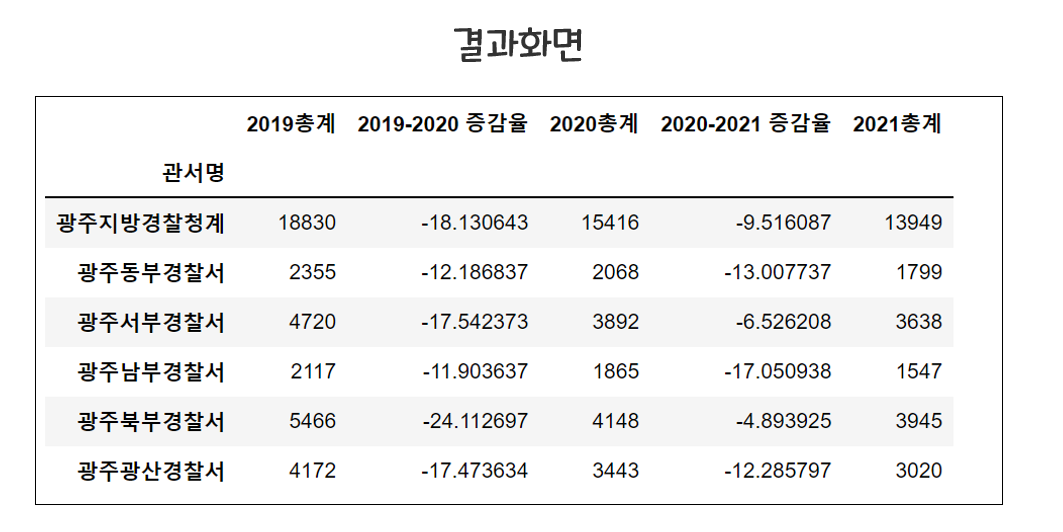
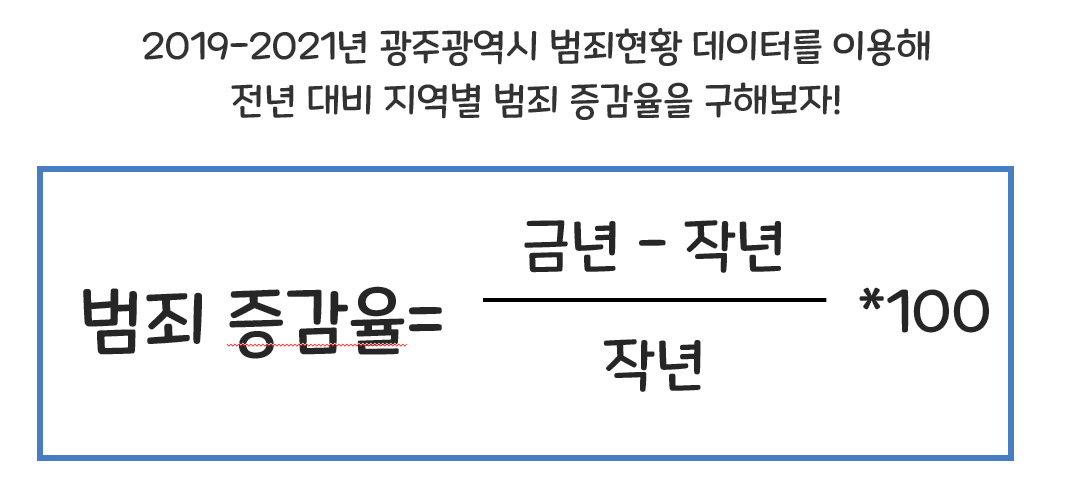

In [127]:
# 증감률 구해서 df 업데이트 해주기
temp2019['2019-2020 증감률'] = (temp2020['2020총계'] - temp2019['2019총계']) / temp2019['2019총계'] * 100
temp2020['2020-2021 증감률'] = (temp2021['2021총계'] - temp2020['2020총계']) / temp2020['2020총계'] * 100

# 필요한 정보만 temp df에서 빼서 개별 df 생성
result2019 = temp2019.loc[:,  '2019총계' : '2019-2020 증감률']
result2019
result2020 = temp2020.loc[:, '2020총계' : '2020-2021 증감률']
result2020
total2021 = temp2021.loc[: , '2021총계']
total2021

# concat으로 df 다시 붙여넣기
pd.concat([result2019, result2020, total2021], axis = 1)

C:\Users\ottki\AppData\Local\Temp\ipykernel_17220\1181904308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2019['2019-2020 증감률'] = (temp2020['2020총계'] - temp2019['2019총계']) / temp2019['2019총계'] * 100
C:\Users\ottki\AppData\Local\Temp\ipykernel_17220\1181904308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2020['2020-2021 증감률'] = (temp2021['2021총계'] - temp2020['2020총계']) / temp2020['2020총계'] * 100


,2019총계,2019-2020 증감률,2020총계,2020-2021 증감률,2021총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [134]:
# 1. 각 연도별 범죄 데이터의 총합을 구해서 새로운 컬럼(열) 생성하기 (컬럼명 : '총합')
# (단 재실행 했을 때 결과가 누적되지 않도록)

data2019['총합'] = data2019.loc[:, '살인':'폭력'].sum(axis=1)
data2020['총합'] = data2020.loc[:, '살인':'폭력'].sum(axis=1)
data2021['총합'] = data2021.loc[:, '살인':'폭력'].sum(axis=1)


In [136]:
# 2. 구분 컬럼이 '발생건수' 인 데이터들만 가져오기 (boolean 인덱싱)
temp2019 = data2019[data2019['구분'] == '발생건수']
temp2020 = data2020[data2020['구분'] == '발생건수']
temp2021 = data2021[data2021['구분'] == '발생건수']


In [138]:
# 3. 2번에 담아둔 데이터에서 '총합' 컬럼을 기준으로 데이터 가져오기 (Series형태)
s2019 = temp2019['총합']
s2020 = temp2020['총합']
s2021 = temp2021['총합']

s2019

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
Name: 총합, dtype: int64

In [140]:
# 4. 3번에 담아둔 총합 데이터(Series)의 이름 바꿔주기
# 2019총계, 2020총계, 2021총계

s2019.name = '2019총계'
s2020.name = '2020총계'
s2021.name = '2021총계'

In [142]:
# 5. 범죄 증감율 계산하기 (금년-작년)/작년*100

# 2019 ~ 2020 증감율 구한 뒤 새로운 변수안에 담아주기
rs2020 = (s2020-s2019)/s2019*100
rs2021 = (s2021-s2020)/s2020*100



In [145]:
# 6 증감률 데이터의 이름 바꿔주기

rs2020.name = '2019~2020 증감율'
rs2021.name = '2020-2021 증감율'

In [146]:
# 7 데이터 프레임으로 변형하기 : concat() 사용
pd.concat([s2019,rs2020,s2020,rs2021,s2021], axis = 1)

,2019총계,2019~2020 증감율,2020총계,2020-2021 증감율,2021총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020
